In [1]:
# !pip install tensorflow

In [63]:
## Import Libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
tf.__version__

# pip freeze > requirements.txt

'2.17.0'

In [3]:
## Read Data ##

data = pd.read_csv('Student_performance_data.csv')

# data.shape: (2392, 15)

# drop StudentID and GPA since they don't add value to the model
data = data.drop(['StudentID', 'GPA'], axis=1)

print(data.dtypes)

data.head()

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GradeClass           float64
dtype: object


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [4]:
## Data Prep ##

# features and labels
features = data.iloc[:, 0:-1]
labels = data.iloc[:, -1] ## GradeClass

# one-hot encoding for categorical variables with more than 2 categories
categories = ['Ethnicity', 'ParentalEducation', 'ParentalSupport']
features = pd.get_dummies(features, columns=categories)

# convert one-hot encoded columns to integers
bool_columns = features.select_dtypes(include='bool').columns
features[bool_columns] = features[bool_columns].astype(int)

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

X_train.head()

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_0,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
642,18,1,18.118879,24,1,1,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1752,16,1,2.469271,19,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1401,17,0,3.456401,25,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2032,17,1,15.838131,25,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
990,16,0,1.045373,19,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


In [5]:
## Standardize Data ##

numericals = ['Age', 'StudyTimeWeekly', 'Absences']

# ColumnTransformer instance
ct = ColumnTransformer([('standardize', StandardScaler(), numericals)], remainder='passthrough')

# fit and transform the data
X_train_std = ct.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)

# transform the test data
X_test_std = ct.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)

X_train_std.head()


,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_0,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
0,1.372851,1.468159,1.105915,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.405858,-1.276773,0.516509,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.483497,-1.103632,1.223797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.483497,1.068117,1.223797,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.405858,-1.526524,0.516509,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


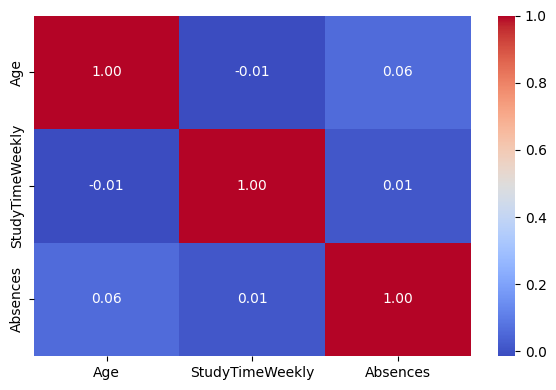

In [6]:
# correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(X_train_std[numericals].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

# seems that there is no multicollinearity between the numerical variables

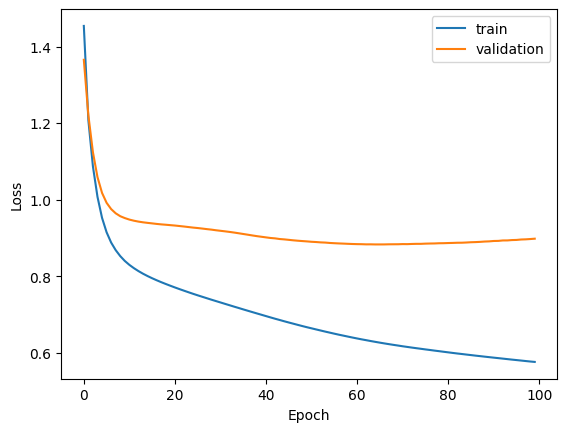

In [80]:
## Train Neural Network with package ##
# Set the seed for reproducibility
random.seed(42)


def model_design():

    # define the model
    model = Sequential()

    # input layer
    model.add(InputLayer(shape=(X_train_std.shape[1],)))

    # hidden layers
    model.add(Dense(32, activation='relu'))

    # output layer for 5 classes, softmax is for multi-class classification
    model.add(Dense(5, activation='softmax'))

    # optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

def plot_history(model, batch_size=32, epochs=100):

    # train the model
    history = model.fit(X_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)

    # plot the training and validation loss
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

model = model_design()
plot_history(model)


Since the validation loss curve is significantly higher than the training loss curve and the two lines do not converge, it indicates that the model is overfitting. This means the model performs well on the training data but does not generalize well to new data.

Batch size: 8


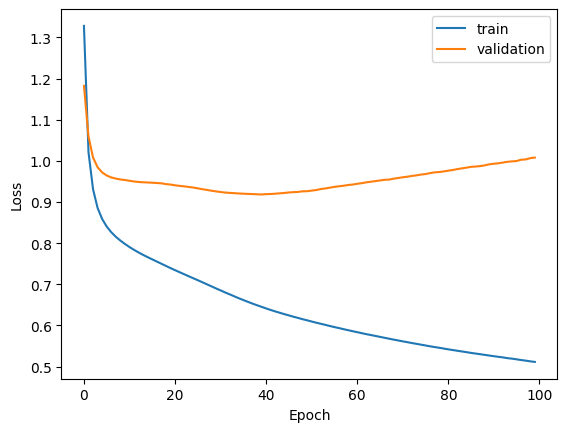

Batch size: 16


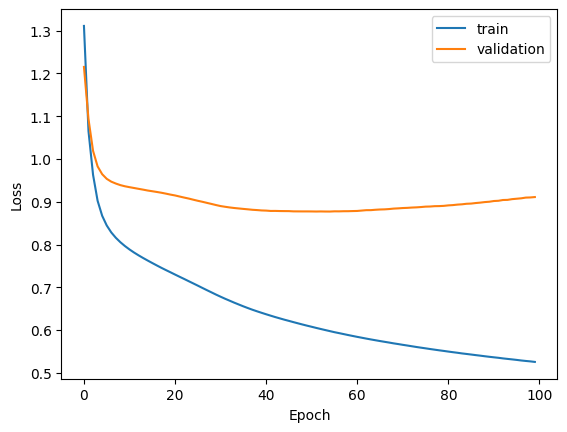

Batch size: 32


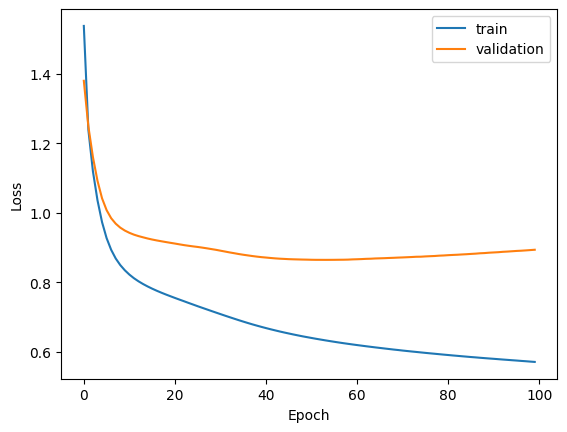

Batch size: 64


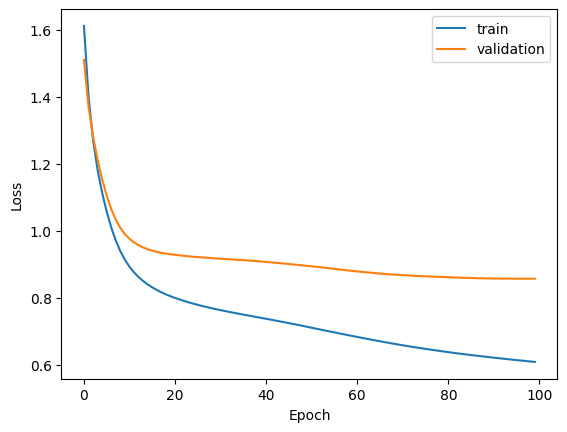

In [50]:
# hypertune batch size

# batch size
batch_sizes=[8, 16, 32, 64]

for batch_size in batch_sizes:
    print(f'Batch size: {batch_size}')
    model = model_design()
    plot_history(model, batch_size)

From plots above, batch size of 32 can be kept

Epoch 73: early stopping


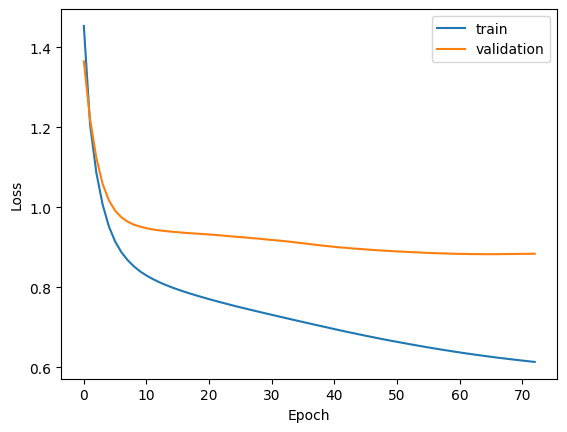

In [79]:
# try early stopping

# Set the seed for reproducibility
random.seed(42)

def plot_history_early_stopping(model, batch_size=32, epochs=100):
    # early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)

    # train the model
    history = model.fit(X_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2, callbacks=[early_stopping])

    # plot the training and validation loss
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

model_2 = model_design()
plot_history_early_stopping(model_2)


Epoch 96: early stopping


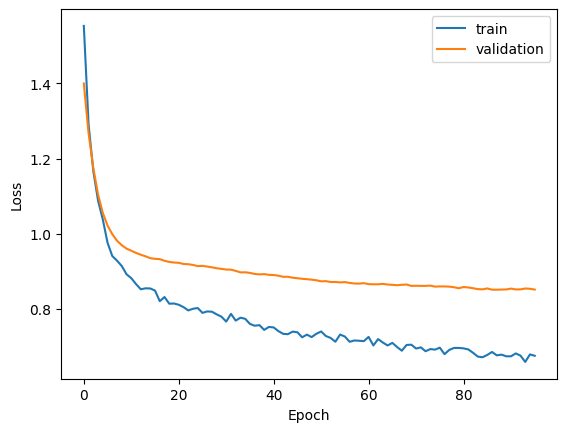

In [81]:
# model with dropout

def model_design_dropout():
    
        # define the model
        model = Sequential()
    
        # input layer
        model.add(InputLayer(shape=(X_train_std.shape[1],)))
    
        # hidden layers
        model.add(Dense(32, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.2))
    
        # output layer for 5 classes, softmax is for multi-class classification
        model.add(Dense(5, activation='softmax'))
    
        # optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
        # compile the model
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
        return model

model_3 = model_design_dropout()
plot_history_early_stopping(model_3)

Val and Train curves still don't merge, let's try reducing activation neurons

Epoch 94: early stopping


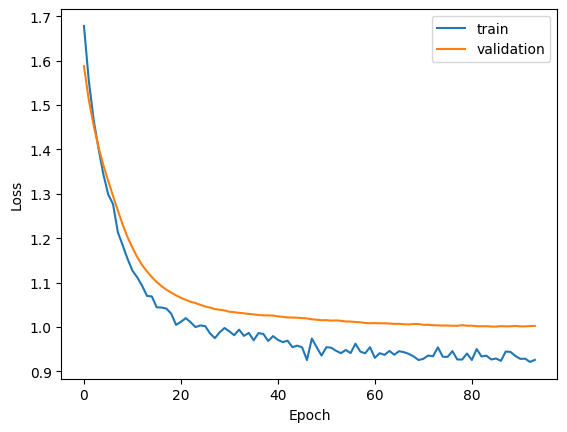

In [83]:
# model design dropout with less dense layer

def model_design_dropout_less_dense():
        
    # define the model
    model = Sequential()

    # input layer
    model.add(InputLayer(shape=(X_train_std.shape[1],)))

    # hidden layers
    model.add(Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))

    # output layer for 5 classes, softmax is for multi-class classification
    model.add(Dense(5, activation='softmax'))

    # optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model_4 = model_design_dropout_less_dense()
plot_history_early_stopping(model_4)